# Biomedical Data Bases, 2020-2021
### Web Scraping
These are notes by prof. Davide Salomoni (d.salomoni@unibo.it) for the Biomedical Data Base course at the University of Bologna, academic year 2020-2021.

We will here demonstrate with a simple example how to fetch and process some data, related in particular to posting of bioinformatics jobs. Study the slides for more details and remember **not to overuse** web scraping.

## Import all necessary libraries

In [1]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Example 1: scraping bioinformatics jobs

### Get the page

In [2]:
LENGTH = 15 # number of jobs to retrieve
JOB_URL = 'https://www.bioinformatics.org/jobs/?group_id=101&summaries=1&length=%s' % (LENGTH-1)

# get the HTML of the page with requests.get()
r = requests.get(JOB_URL)

# now pass the page content to bs4
soup = BeautifulSoup(r.content)

### Get the elements that interest us

Looking at the HTML of the web page, it turns out that the job opportunities are in some _tables_. But the web page has many tables: how to find the ones that are interesting for us? We notice that the job opportunities are in tables where the text "Opportunity" is part of the content.

So, we get first all the tables, and then we retain only those with "Opportunity" in the content, storing them in a list.

In [3]:
# get all the tables
tables = soup.find_all('table')

# store the interesting tables in a list
entries = list()
for table in tables:
    if 'Opportunity' in table.text:
        entries.append(table)

In [4]:
# if we look at the list 'entries', we realize that the first two tables are not intesting, so we remove them
entries = entries[2:]

In [5]:
# check what an entry looks like
entries[0]

<table style="border: none; border-collapse: collapse; width: 100%;">
<tr>
<td style="font-size: small; padding-left: 0.25em; vertical-align: top; width: 100%;">
<div>
<strong><a href="https://www.bioinformatics.org/forums/forum.php?forum_id=14591">Opportunity: Research Scientist II / Founding Director of the Computational Informatics Center Core Facility (#F609P) @ University of North Texas -- Denton, TX (US)</a></strong><br/>
<span style="margin-left: 1rem; font-size: small; font-style: italic;">Submitted by <a href="https://www.bioinformatics.org/people/index.php?user_hash=a9690629558a7696" title="">Serdar Bozdag</a>; posted on Thursday, January 06, 2022</span> <span style="font-size: small;"></span>
</div>
</td>
</tr>
</table>

In [6]:
# each entry is a BeatifulSoup structure
type(entries[0])

bs4.element.Tag

In [7]:
# entries[0] looks OK. We can apply several bs4 methods to it. For instance, let's see the text
entries[0].text

'\n\n\n\nOpportunity: Research Scientist II / Founding Director of the Computational Informatics Center Core Facility (#F609P) @ University of North Texas -- Denton, TX (US)\nSubmitted by Serdar Bozdag; posted on Thursday,\xa0January\xa006,\xa02022 \n\n\n\n'

In [8]:
# OK, there is some parsing to do on the text to remove unwanted elements. We will do it later.

# Let's now use the bs4 find_all method to find the 'a' HTML tags (identifying links)
links = entries[0].find_all('a', href=True)

# check what we got
links

[<a href="https://www.bioinformatics.org/forums/forum.php?forum_id=14591">Opportunity: Research Scientist II / Founding Director of the Computational Informatics Center Core Facility (#F609P) @ University of North Texas -- Denton, TX (US)</a>,
 <a href="https://www.bioinformatics.org/people/index.php?user_hash=a9690629558a7696" title="">Serdar Bozdag</a>]

In [9]:
# we got a list, of which we will want to retain only the first element (the second refers to the person who posted the job opportunity)

# let's print out the "href", i.e. the actual link of the HTML tag
for link in links:
    print(link['href'])

https://www.bioinformatics.org/forums/forum.php?forum_id=14591
https://www.bioinformatics.org/people/index.php?user_hash=a9690629558a7696


### Parse the text and store it in a list

Now that we have understood how to process the various elements of the HTML page, let's put everything together.

We will parse the text of each entry using some Python constructs, as well as a _regular expression_:
- use strip() to remove the \n characted at the beginning and at the end of each line
- the text contained between ':' and '@' is the job title
- the text contained between '@' and '\n' is the job location
- the text after 'posted on ' is the publication data. Here we also need to replace \xa0 with a regular space

In [10]:
data = list()
for entry in entries:
    link = entry.find_all('a', href=True)[0]['href'] # we keep only the first link (see above)
    text = entry.text.strip()
    
    # parse the text, grouping the interesting parts as explained above
    # look up 'regular expressions in Python' if you are not familiar with the re.search syntax 
    m = re.search('Opportunity: (.+?) @ (.+?)\n.+?; posted on (.+?)$', text)
    
    # now extract the various parts of the regexp
    title = m.group(1)
    location = m.group(2)
    date = m.group(3).replace('\xa0', ' ') # replace also \xa0 with a space
    
    # finally, append all the extracted elements to a list
    data.append([title, location, date, link])

In [11]:
# check what we got in the end
data

[['Research Scientist II / Founding Director of the Computational Informatics Center Core Facility (#F609P)',
  'University of North Texas -- Denton, TX (US)',
  'Thursday, January 06, 2022',
  'https://www.bioinformatics.org/forums/forum.php?forum_id=14591'],
 ['Bioinformatician (#2108-12755-BIOI-0T4)',
  'ASRT, Inc. -- Atlanta, GA (US)',
  'Thursday, January 06, 2022',
  'https://www.bioinformatics.org/forums/forum.php?forum_id=14590'],
 ['Flatiron Research Fellow, Center for Computational Biology',
  'Simons Foundation -- New York, NY (US)',
  'Thursday, January 06, 2022',
  'https://www.bioinformatics.org/forums/forum.php?forum_id=14589'],
 ['Flatiron Research Fellow for the Study of Living Materials (CCB)',
  'Simons Foundation -- New York, NY (US)',
  'Thursday, January 06, 2022',
  'https://www.bioinformatics.org/forums/forum.php?forum_id=14588'],
 ['Research Assistant Professor, Neuroinformatics',
  'The University of Chicago -- Chicago, IL (US)',
  'Monday, January 03, 2022',


## Example 2: getting hourly weather forecasts

This and the following example are provided without many explanations. You should analyze the code, break it down into multiple cells and verify what each operations does. There are also other ways to extract the same info: you are encouraged to find and test them.

     0              1    2
0   13         sereno  5.3
1   14         sereno  5.6
2   15         sereno  5.6
3   16         sereno  5.0
4   17  poco nuvoloso  2.9
5   18  poco nuvoloso  2.0
6   19  poco nuvoloso  1.4
7   20  poco nuvoloso  0.8
8   21    nubi sparse  0.2
9   22    nubi sparse -0.1
10  23    nubi sparse -0.3
11  24    nubi sparse -0.5
12   1  poco nuvoloso -0.8
13   2         sereno -1.3


<AxesSubplot:title={'center':'Hourly weather forecast for Bologna'}, xlabel='Hour', ylabel='T (°C)'>

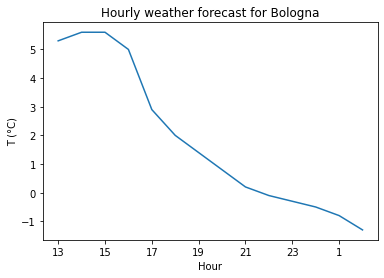

In [12]:
WEATHER_URL = 'https://www.ilmeteo.it/meteo/Bologna'
r = requests.get(WEATHER_URL)
soup = BeautifulSoup(r.content) 

# extract the main table, identified by a class called 'datatable'
infos = soup.find_all(class_ = 'datatable')

# extract rows and columns of that table, looking at the tags <tr> and <td>
data = list()
rows = infos[0].find_all('tr')
for row in rows:
    cols = row.find_all('td')
    if len(cols):
        # just keep the text of each cell
        cols = [i.text.strip() for i in cols]
        # put everything in data, removing empty entries
        data.append([i for i in cols if i])

# note that at the beginning of the data list there are several uniteresting elements
# let's keep only the list elements where the first element is a number
data = [i for i in data if i[0].isdigit()]

# create a Pandas data frame from the data list. Column names will be by default 0, 1, 2, ...
df = pd.DataFrame(data)

# keep only the column I am interesting in (0, 1, 2) and convert column 2 into float
weather = df.iloc[:, [0,1,2]].copy()
weather.iloc[:,2] = weather.iloc[:,2].map(lambda x: float(x[:-1]))

# see what it looks like
print(weather)

# plot it 
weather.plot(x=0, y=2, xlabel='Hour', ylabel='T (°C)', legend=False, title='Hourly weather forecast for Bologna')

## Example 3: getting weekly weather forecasts

      Date  T(min)  T(max)
0    Ven 7      -1       6
1    Sab 8      -3       5
2    Dom 9      -2       5
3   Lun 10      -2       6
4   Mar 11      -3       6
5   Mer 12       0       7
6   Gio 13      -2       6
7   Ven 14      -3       5
8   Sab 15      -1       6
9   Dom 16      -1       7
10  Lun 17       0       6
11  Mar 18       0       5
12  Mer 19      -1       6
13  Gio 20      -1       6
14  Ven 21      -1       6
15  Sab 22      -1       6


<AxesSubplot:title={'center':'Weekly weather forecast for Bologna'}, xlabel='Date', ylabel='T (°C)'>

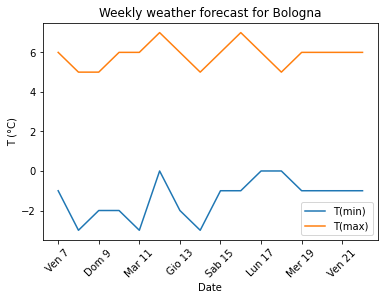

In [13]:
WEATHER_URL = 'https://www.ilmeteo.it/meteo/Bologna'
r = requests.get(WEATHER_URL)
soup = BeautifulSoup(r.content)

# find all the tags like <ul id='daytabs' ...>
infos = soup.find_all('ul', id='daytabs')

# find all the HTML lists (tag 'li')
entries = infos[0].find_all('li')

# looking at the entries, we notice that we must remove those that do not start with a weekday
days = ['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom']
data = list()
for entry in entries:
    text = list(entry.text.split())
    if text[0] in days:
        data.append(text)

# the list now looks almost ok, but in order to plot it we must:
# 1) join the first two fields: 'Sab' and '7' should become 'Sab 7' 
# 2) separate the third field: 19°35° should become '19' and '35'
for row in data:
    one, two, three = row
    tmin, tmax, _ = three.split('°')
    row[0] = one + ' ' + two
    row[1] = int(tmin)
    row[2] = int(tmax)

# good, we can now create a Pandas data frame from that list
df = pd.DataFrame(data, columns = ['Date', 'T(min)', 'T(max)'])
print(df)

# and finally plot it
df.plot(x='Date', y=['T(min)','T(max)'], rot=45, ylabel='T (°C)', title='Weekly weather forecast for Bologna')